# An Exploratory Analysis of NYC Yellow Taxis (June 2017)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('yellow_tripdata_2017-06.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,7.5,1.0,0.5,1.86,0.0,0.3,11.16
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,6.0,1.0,0.5,2.34,0.0,0.3,10.14
2,2,2017-06-08 08:16:49,2017-06-08 15:43:22,6,5.63,1,N,137,41,2,21.5,1.0,0.5,0.00,0.0,0.3,23.30
3,2,2017-06-29 15:52:35,2017-06-29 16:03:27,6,1.43,1,N,142,48,1,8.5,1.0,0.5,0.88,0.0,0.3,11.18
4,1,2017-06-01 00:00:00,2017-06-01 00:03:43,1,0.60,1,N,140,141,1,4.5,0.5,0.5,2.00,0.0,0.3,7.80


In [3]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06
mean,1.546961e+00,1.623943e+00,2.978617e+00,1.045527e+00,1.626235e+02,1.607379e+02,1.334040e+00,1.328727e+01,3.413314e-01,4.972247e-01,1.878480e+00,3.376697e-01,2.996046e-01,1.664632e+01
std,4.977898e-01,1.264608e+00,5.704095e+00,5.665036e-01,6.675223e+01,7.047343e+01,4.929622e-01,2.151675e+02,4.623294e-01,7.625157e-02,2.696221e+00,2.022799e+00,1.441594e-02,2.153387e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.500000e+02,-5.056000e+01,-5.000000e-01,-7.400000e+01,-1.250000e+01,-3.000000e-01,-5.503000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.185000e+01
75%,2.000000e+00,2.000000e+00,3.100000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.817000e+01
max,2.000000e+00,9.000000e+00,9.496980e+03,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,6.304618e+05,2.250000e+01,1.400000e+02,4.440000e+02,9.900000e+02,1.000000e+00,6.304631e+05


In [4]:
#Datatype of each column
#df.info()

In [5]:
#If any, how many fields with missing data in each column
#df.isnull().sum() 

In [6]:
#Read in taxi zone lookup table
zone_df = pd.read_csv('taxi+_zone_lookup.csv')
zone_df.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


## Imagine that you decide to drive a taxi for 10 hours each week to earn a little extra money. Explain how you would approach maximizing your income as a taxi driver.

To maximize my income considering limited time, I will opt to drive at a location and time with high demand. This is to ensure that occupancy of my taxi is almost guaranteed for the time I drive.

In [7]:
#Convert the datatime columns from string to datatime data type to allow for aggregation by days and hours
df["pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

df["pickup_day"] = df["pickup_datetime"].dt.weekday_name
df["pickup_hour"] = df["pickup_datetime"].dt.hour

df["dropoff_day"] = df["dropoff_datetime"].dt.weekday_name
df["dropoff_hour"] = df["dropoff_datetime"].dt.hour

In [8]:
#Trip data with new columns
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_datetime,dropoff_datetime,pickup_day,pickup_hour,dropoff_day,dropoff_hour
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,...,1.86,0.0,0.3,11.16,2017-06-08 07:52:31,2017-06-08 08:01:32,Thursday,7,Thursday,8
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,...,2.34,0.0,0.3,10.14,2017-06-08 08:08:18,2017-06-08 08:14:00,Thursday,8,Thursday,8
2,2,2017-06-08 08:16:49,2017-06-08 15:43:22,6,5.63,1,N,137,41,2,...,0.00,0.0,0.3,23.30,2017-06-08 08:16:49,2017-06-08 15:43:22,Thursday,8,Thursday,15
3,2,2017-06-29 15:52:35,2017-06-29 16:03:27,6,1.43,1,N,142,48,1,...,0.88,0.0,0.3,11.18,2017-06-29 15:52:35,2017-06-29 16:03:27,Thursday,15,Thursday,16
4,1,2017-06-01 00:00:00,2017-06-01 00:03:43,1,0.60,1,N,140,141,1,...,2.00,0.0,0.3,7.80,2017-06-01 00:00:00,2017-06-01 00:03:43,Thursday,0,Thursday,0


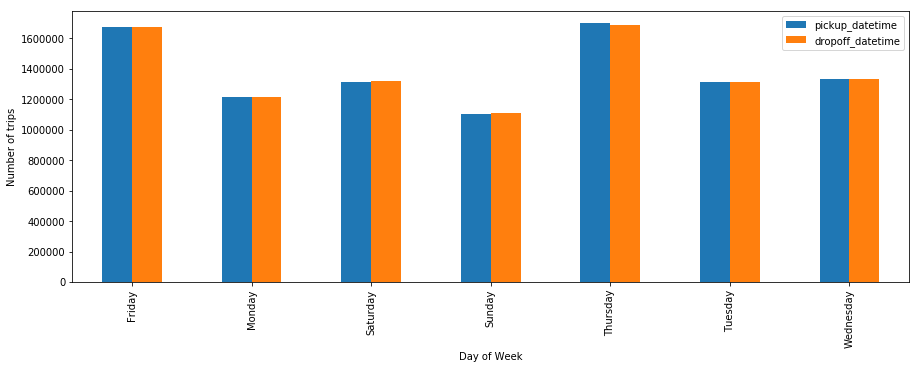

In [9]:
#Number of pickups and dropoffs per day of the week to enable me decide which day will be best for work
PU_day_agg = df[["pickup_datetime", "pickup_day"]].groupby("pickup_day").count()
DO_day_agg = df[["dropoff_datetime", "dropoff_day"]].groupby("dropoff_day").count()
daily_agg = pd.concat([PU_day_agg, DO_day_agg], axis = 1).reset_index()


ax = daily_agg.plot(x='index', y=['pickup_datetime', 'dropoff_datetime'], kind='bar', style="-o", figsize=(15,5))
ax.set_ylabel("Number of trips")
ax.set_xlabel("Day of Week")
plt.show()

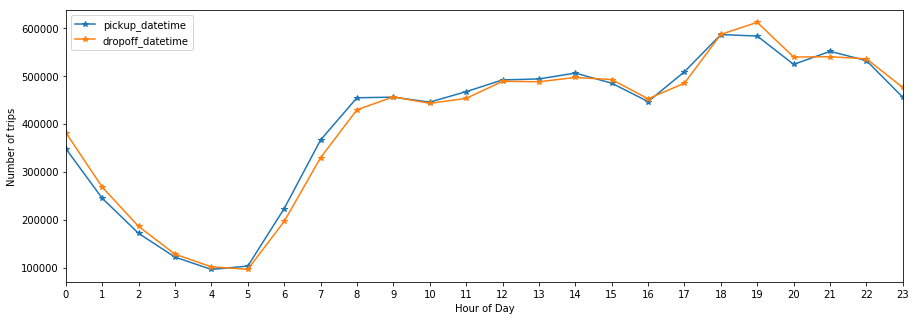

In [10]:
#Number of pickups and dropoffs per hour of the day to enable me decide which hours are best on the days I decide to 
#work based on the plot above

PU_hr_agg = df[["pickup_datetime", "pickup_hour"]].groupby("pickup_hour").count()
DO_hr_agg = df[["dropoff_datetime", "dropoff_hour"]].groupby("dropoff_hour").count()
hr_agg = pd.concat([PU_hr_agg, DO_hr_agg], axis = 1).reset_index()

ax = hr_agg.plot(x='index', y=['pickup_datetime', 'dropoff_datetime'], kind='line', style="-*", figsize=(15,5))
ax.set_ylabel("Number of trips")
ax.set_xticks(hr_agg["index"].values) 
ax.set_xlabel("Hour of Day")
plt.show()

In [11]:
#Location with most pickups
PU_Loc_agg = df[["pickup_datetime", "PULocationID"]].groupby("PULocationID").count()
PU_Loc_agg = PU_Loc_agg.reset_index().sort_values('pickup_datetime', ascending=False).head(10)
top_pickup_loc = zone_df.loc[zone_df['LocationID'].isin(PU_Loc_agg["PULocationID"])]

In [12]:
#Top 10 Locations with high demand
top_pickup_loc

,LocationID,Borough,Zone,service_zone
47,48,Manhattan,Clinton East,Yellow Zone
141,142,Manhattan,Lincoln Square East,Yellow Zone
160,161,Manhattan,Midtown Center,Yellow Zone
161,162,Manhattan,Midtown East,Yellow Zone
169,170,Manhattan,Murray Hill,Yellow Zone
185,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone
229,230,Manhattan,Times Sq/Theatre District,Yellow Zone
233,234,Manhattan,Union Sq,Yellow Zone
235,236,Manhattan,Upper East Side North,Yellow Zone
236,237,Manhattan,Upper East Side South,Yellow Zone


With a limited 10 hours per week, my goal with be to work when the demand for taxia is high. This is so that there will be no extended periods with a passenger in the taxi. From the analysis above, it can be seen that Thurdays and Fridays are the days with the most demand. Demand for taxis are highest between 5pm and 10pm and the location 

In [13]:
"""
#Select the top 10 pick up zones using SQL subquery
SELECT * 
FROM zone_df
WHERE LocationID IN (
        SELECT count(pickup_datetime)
        FROM df
        GROUP BY PULocationID
        ORDER BY count(pickup_datetime)
        LIMIT 10;
);
"""

'\n#Select the top 10 pick up zones using SQL subquery\nSELECT * \nFROM zone_df\nWHERE LocationID IN (\n        SELECT count(pickup_datetime)\n        FROM df\n        GROUP BY PULocationID\n        ORDER BY count(pickup_datetime)\n        LIMIT 10;\n);\n'

## If you could enrich the dataset, what would you add? Is there anything in the dataset that you don’t find especially useful?

Attempts at enriching the dataset can include:
    - Identifying and removing outliers as necessary
    - Checking for and handling missing values
    - Find other data sources with data such such as longitide and latitude for pickup and dropoff zones to allow more pinpoint description.
    - Differentiate FHV rides YT rides
        
I find all variables in the data set to be useful in someway, although not all were useful for this task. For example, tip amount and payment type. However, a closer look at tip amount can tell what time of the day passengers tend to tip more. Is it during commutes to work or during happy hours after relaxing with friends?